In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
#LOading data
data = pd.read_csv('BTC-EUR1.csv' , index_col = 'Date' , parse_dates = True)

#Transformation du outlier(Log normale distribution)
data["Volume"] = data['Volume'].apply(lambda x : np.log(x))
print(data.head())

#Test outlier
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  359.546204  361.468506  351.586884  355.957367  355.957367   
2014-09-18  355.588409  355.505402  319.789459  328.539368  328.539368   
2014-09-19  328.278503  330.936707  298.921021  307.761139  307.761139   
2014-09-20  307.665253  329.978180  303.931244  318.758972  318.758972   
2014-09-21  318.120514  321.504517  306.502197  310.632446  310.632446   

               Volume  
Date                   
2014-09-17  16.612131  
2014-09-18  17.099869  
2014-09-19  17.201936  
2014-09-20  17.173690  
2014-09-21  16.845771  
Open         20183.383606
High         20519.514527
Low          19824.035096
Close        20208.144226
Adj Close    20208.144226
Volume           5.262420
dtype: float64


In [3]:
#Creating matrix
X = data[["Open" , "High" , "Low" , "Adj Close" , "Volume"]].to_numpy()
y = data[["Close"]].to_numpy()

print(X.shape)
print(y.shape)

(3305, 5)
(3305, 1)


In [4]:
#Splitting data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

#Normalizing data
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2644, 5)
(661, 5)
(2644, 1)
(661, 1)


In [123]:
#Bias column
X_train = np.hstack((X_train , np.ones((X_train.shape[0] , 1))))
X_test = np.hstack((X_test , np.ones((X_test.shape[0] , 1))))

print(X_train)
print(X_test)

[[3.56404165e-01 3.64894752e-01 3.55440795e-01 3.62626041e-01
  4.03348624e-04 1.00000000e+00]
 [1.79031094e-02 1.87971173e-02 1.78879686e-02 1.86371980e-02
  3.21251232e-04 1.00000000e+00]
 [3.29133557e-03 3.56128868e-03 3.28171568e-03 3.49640980e-03
  2.94848876e-04 1.00000000e+00]
 ...
 [6.14156342e-02 6.16967054e-02 6.08293349e-02 6.12602507e-02
  3.86170082e-04 1.00000000e+00]
 [8.93725381e-01 9.01361953e-01 8.80479619e-01 9.00436982e-01
  4.04875078e-04 1.00000000e+00]
 [6.05400595e-01 6.14929569e-01 5.89624652e-01 6.00916531e-01
  4.04169082e-04 1.00000000e+00]]
[[6.88857616e-03 6.97169553e-03 6.88511693e-03 6.93636927e-03
  3.03598076e-04 1.00000000e+00]
 [5.13268519e-03 5.14151381e-03 4.98009409e-03 5.02914133e-03
  2.75101511e-04 1.00000000e+00]
 [1.49258792e-01 1.50239045e-01 1.41224675e-01 1.44389336e-01
  4.09427218e-04 1.00000000e+00]
 ...
 [4.70807295e-01 4.83366931e-01 4.55925489e-01 4.69251982e-01
  4.01848947e-04 1.00000000e+00]
 [6.04806622e-02 6.26507409e-02 5.94433

In [5]:
theta = np.random.randn(X_train.shape[1] , 1)
print(theta.shape)

(5, 1)


In [6]:
#Creating model
def model(X_train , theta):
    return X_train.dot(theta)

In [7]:
model(X_train , theta)

array([[-0.83544223],
       [-0.04299863],
       [-0.00819586],
       ...,
       [-0.14186338],
       [-2.0788125 ],
       [-1.40394044]])

In [8]:
#Cost function
def cost(X_train , y_train , theta):
    m = len(y_train)
    return 1 / (2 * m) * np.sum((model(X_train , theta) - y_train)**2)

In [9]:
cost(X_train , y_train , theta)

174924883.80324423

In [10]:
#Gradient
def grad(X_train , y_train , theta):
    m = len(y_train)
    return 1 / m * X_train.T.dot(model(X_train , theta) - y_train)

In [11]:
grad(X_train , y_train , theta)

array([[-5.90615103e+03],
       [-6.04896900e+03],
       [-5.75511488e+03],
       [-5.91408078e+03],
       [-4.99567822e+00]])

In [12]:
#Gradien descent
def d_grad(X_train , y_train , theta , learning_rate , n_iter):

    #Learning curve
    cost_history = np.zeros(n_iter)

    #TRaining
    for i in tqdm(range(n_iter)):
        theta = theta - learning_rate * grad(X_train , y_train , theta)
        cost_history[i] = cost(X_train , y_train , theta)
    return theta , cost_history

In [13]:
theta , cost_history = d_grad(X_train , y_train , theta , learning_rate = 0.01 , n_iter = 100000)

100%|██████████| 100000/100000 [00:35<00:00, 2851.79it/s]


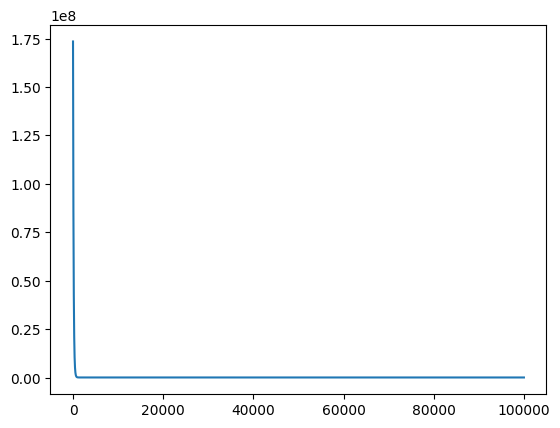

In [14]:
#Plotting learning curve
plt.plot(range(100000) , cost_history)

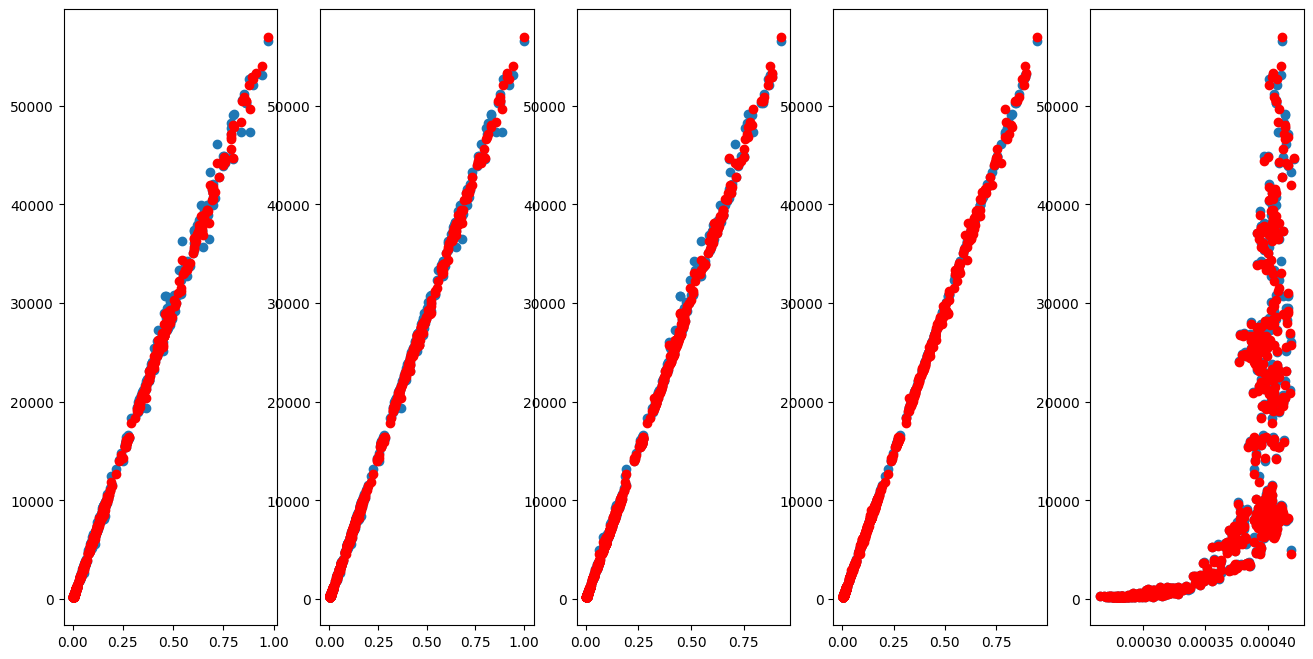

In [15]:
#Prediction
pred = model(X_test , theta)

#Plotting prediction
plt.figure(figsize = (16 , 8))

plt.subplot(1 , 5 , 1)
plt.scatter(X_test[: , 0] , y_test)
plt.scatter(X_test[: , 0] , pred , c = 'r')

plt.subplot(1 , 5 , 2)
plt.scatter(X_test[: , 1] , y_test)
plt.scatter(X_test[: , 1] , pred , c = 'r')

plt.subplot(1 , 5 , 3)
plt.scatter(X_test[: , 2] , y_test)
plt.scatter(X_test[: , 2] , pred , c = 'r')

plt.subplot(1 , 5 , 4)
plt.scatter(X_test[: , 3] , y_test)
plt.scatter(X_test[: , 3] , pred , c = 'r')

plt.subplot(1 , 5 , 5)
plt.scatter(X_test[: , 4] , y_test)
plt.scatter(X_test[: , 4] , pred , c = 'r')

In [16]:
#Coefficient de determination(Performance du modèle)
def coeff(y_test , pred):
    u = ((y_test - pred)**2).sum()
    v = ((y_test - y_test.mean())**2).sum()
    return 1 - (u / v)

In [17]:
coeff(y_test , pred)

0.9994936316612121